# EDA

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 60
pd.options.display.max_info_columns = 60
pd.options.display.max_rows = 100
data = pd.read_csv(r"data/cleared_data.csv")
data.drop(["Unnamed: 0","Tm"],inplace=True,axis=1)
data_eda = data.drop(['Player','Pos'],axis=1)

In [184]:
data_eda.describe()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MVP,votes_first,points_won,points_max,award_share
count,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000,18211.000000
mean,2004.368733,26.623799,53.324804,25.948163,1254.357641,201.647246,436.275548,0.441495,30.297348,85.796222,0.224969,171.349898,350.479326,0.467098,0.474535,99.775356,131.952941,0.703503,62.885673,159.144199,222.029872,120.276426,41.347318,26.103674,76.385646,114.182582,533.367196,12.791994,0.512853,0.200086,0.307665,5.981456,14.096233,10.039844,13.152177,1.631179,1.541739,14.346543,18.849212,1.369085,1.282412,2.652336,0.072620,-1.528428,-0.388891,-1.917248,0.633579,0.002306,0.246390,6.404530,38.737027,0.005995
std,11.930839,4.116372,25.279531,29.330347,912.937302,182.790931,382.458744,0.097163,46.137752,122.179505,0.180176,166.437053,330.610337,0.106478,0.100003,109.296427,138.982131,0.189923,65.982011,144.954127,204.117099,141.050831,37.487977,36.672726,66.460322,78.577825,488.205054,6.149131,0.096387,0.211098,0.214950,4.850148,6.517690,4.957655,9.447598,1.020286,1.780582,6.338286,5.467800,2.088470,1.219175,3.005262,0.099936,3.972726,2.175003,4.937409,1.389700,0.047970,4.169922,64.596217,201.489886,0.059241
min,1982.000000,18.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,-1.000000,-2.100000,-2.519000,-73.800000,-31.100000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,23.000000,34.000000,1.000000,404.000000,49.000000,114.000000,0.404000,0.000000,2.000000,0.000000,38.000000,83.000000,0.431000,0.442000,19.000000,28.000000,0.652000,15.000000,43.000000,61.000000,21.000000,11.000000,4.000000,21.000000,45.000000,127.000000,9.900000,0.482000,0.009000,0.191000,2.400000,9.300000,6.200000,6.500000,1.100000,0.400000,10.900000,15.300000,0.000000,0.300000,0.300000,0.038000,-3.200000,-1.500000,-3.800000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,26.000000,61.000000,11.000000,1173.000000,155.000000,344.000000,0.446000,6.000000,22.000000,0.278000,122.000000,256.000000,0.474000,0.484000,63.000000,87.000000,0.749000,40.000000,125.000000,171.000000,72.000000,33.000000,13.000000,60.000000,111.000000,407.000000,12.900000,0.524000,0.128000,0.277000,4.900000,13.100000,9.200000,10.400000,1.500000,1.000000,13.600000,18.500000,0.600000,1.000000,1.700000,0.081000,-1.300000,-0.400000,-1.500000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,29.000000,76.000000,52.000000,1996.000000,309.000000,668.500000,0.488000,46.000000,133.000000,0.358000,257.000000,527.000000,0.514000,0.521000,143.000000,192.000000,0.814000,90.000000,230.000000,319.000000,166.000000,61.000000,32.000000,115.000000,173.000000,815.000000,15.900000,0.560000,0.355000,0.383000,8.800000,18.200000,13.400000,17.800000,2.000000,2.100000,16.900000,22.100000,2.200000,1.900000,4.100000,0.119000,0.400000,0.800000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,44.000000,

In [185]:
data_eda[data_eda.MVP != 1].count().iloc[0]

18169

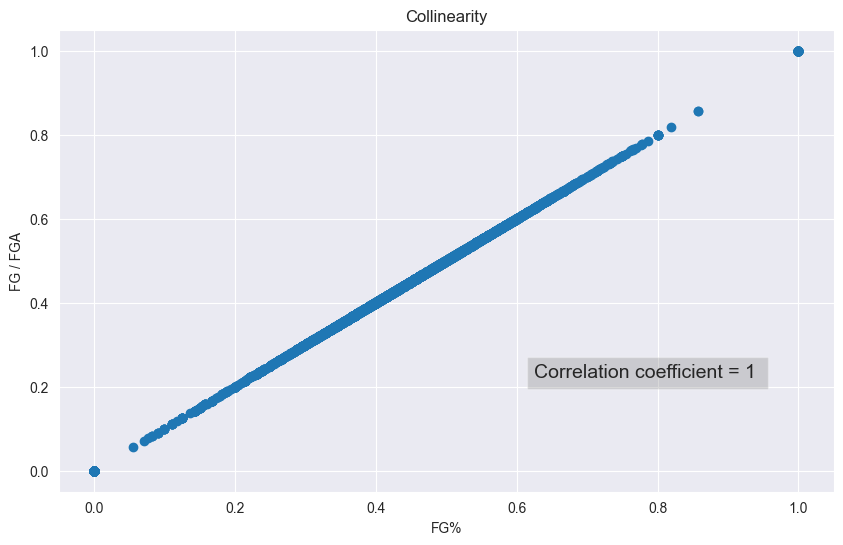

array([[ 1., nan],
       [nan, nan]])

In [186]:
plt.scatter(data["FG%"], data["FG"]/data["FGA"])
plt.xlabel("FG%")
plt.ylabel("FG / FGA")
plt.title("Collinearity")
plt.figtext(.6, .3, "Correlation coefficient = 1 ",fontsize = 14,bbox ={'facecolor':'grey', 
                   'alpha':0.3, 'pad':5})
plt.rcParams['figure.figsize'] = [10,6]
plt.show()
np.corrcoef(data["FG%"], data["FGA"]/data["FG"])

In [187]:
data = data.drop(columns = ["FG%", "3P%","2P%","FT%"], axis = 1)

In [188]:
data_corr = data_eda.drop(["votes_first","award_share","points_won","points_max"],axis = 1)
corr = data_corr.corr() 
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index[1:]
compare = pd.concat( [data_corr[data_corr.MVP == 1][cols].mean(),data_corr[data_corr.MVP == 0][cols].mean()],axis = 1)
compare.columns=['MVP','No-MVP']
print("Pearson correlation")
print(corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10)[1:])
compare


Pearson correlation
VORP    0.246872
OWS     0.217612
WS      0.210500
FT      0.173696
FTA     0.166805
PTS     0.153569
FG      0.146228
DWS     0.146141
2P      0.145392
Name: MVP, dtype: float64


,MVP,No-MVP
VORP,7.769048,0.617084
OWS,10.821429,1.347234
WS,15.809524,2.621922
FT,494.619048,98.862623
FTA,614.119048,130.838351
PTS,2092.690476,529.762618
FG,757.571429,200.362155
DWS,4.988095,1.273846
2P,674.642857,170.186471


In [189]:
corr = data_corr.corr(method='spearman') 
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index[1:]
compare = pd.concat( [data_corr[data_corr.MVP == 1][cols].mean(),data_corr[data_corr.MVP == 0][cols].mean()],axis = 1)
compare.columns=['MVP','No-MVP']
print("Spearman Correlation")
compare["Correlation"] = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10)[1:]
compare = compare[["Correlation","MVP","No-MVP"]]
compare

Spearman Correlation


,Correlation,MVP,No-MVP
WS,0.082468,15.809524,2.621922
OWS,0.082097,10.821429,1.347234
VORP,0.082059,7.769048,0.617084
PER,0.081550,28.111905,12.756580
WS/48,0.081451,0.264357,0.072176
BPM,0.080935,8.769048,-1.941951
PTS,0.080916,2092.690476,529.762618
OBPM,0.080715,6.766667,-1.547603
FG,0.080252,757.571429,200.362155


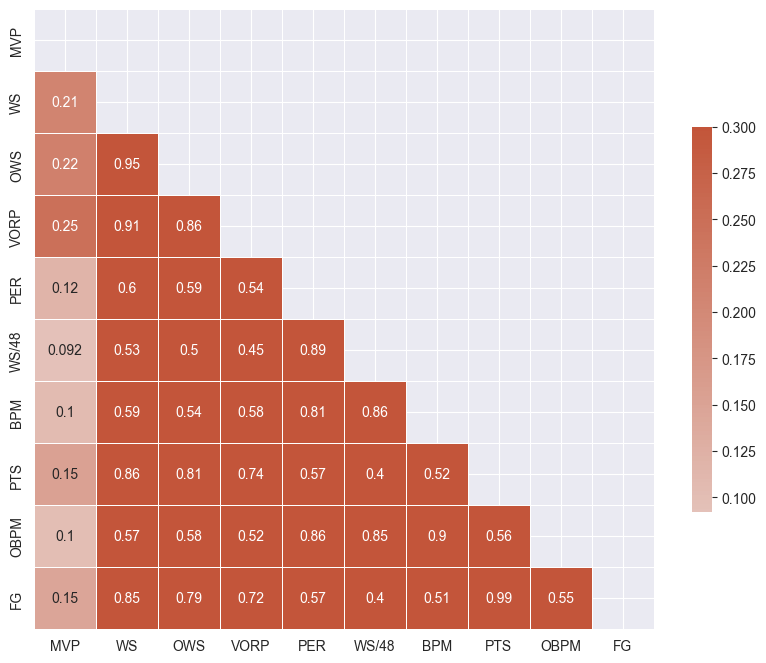

In [190]:
cols = corr['MVP'].sort_values(ascending = False,key = lambda x: abs(x)).head(10).index
mask = np.triu(np.ones_like(data_eda[cols].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = plt.gcf()
fig.set_size_inches(10,10)

sns.heatmap(data_eda[cols].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)
fig.set_facecolor('white')         

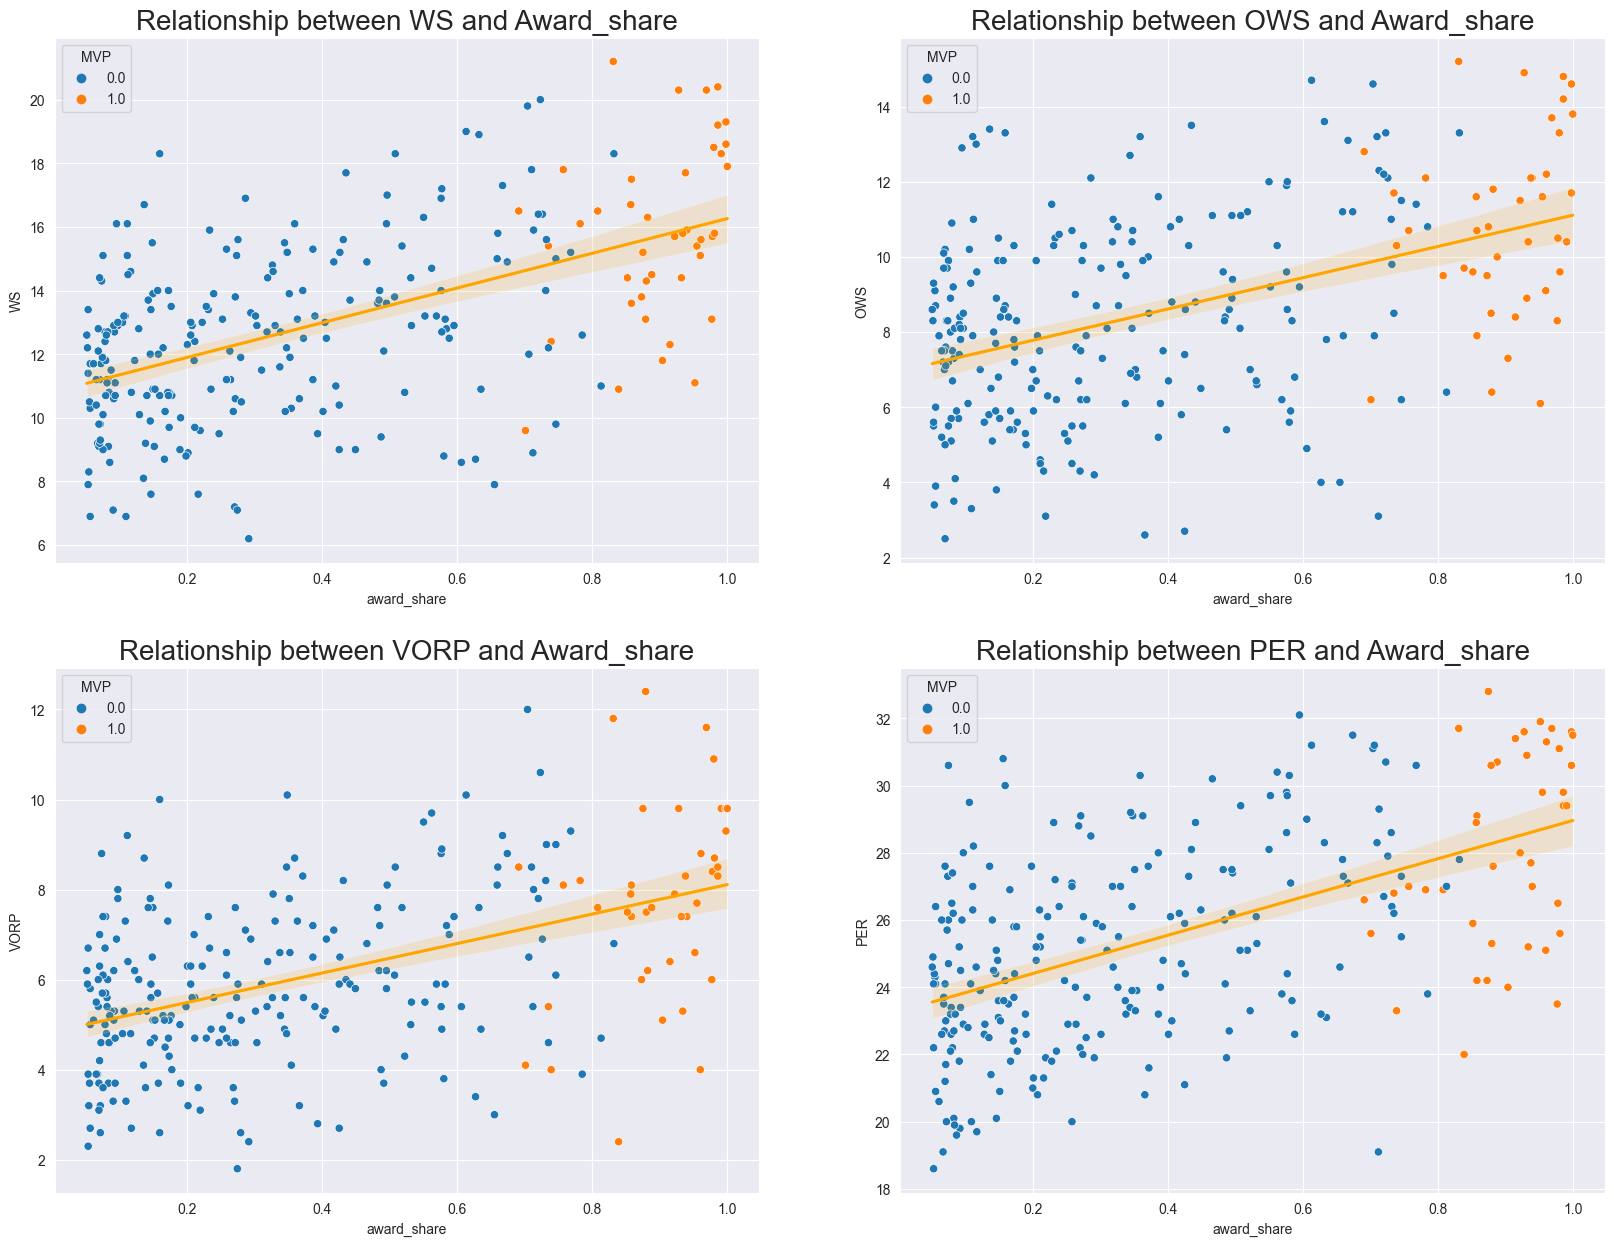

In [191]:
ws = data_eda[data_eda.award_share > 0.05 ]
ws = data_eda[data_eda.award_share > 0.05]

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,15)
sns.scatterplot(x = ws['award_share'],y = ws['WS'],ax = ax[0,0],hue = ws["MVP"])
sns.regplot(x = ws['award_share'],y = ws['WS'],scatter=False,label="Regression line",ax = ax[0,0],color = 'orange')    
ax[0,0].set_title("Relationship between WS and Award_share",fontsize=20)
sns.scatterplot(x = ws['award_share'],y = ws['OWS'],ax = ax[0,1],hue = ws["MVP"])
sns.regplot(x = ws['award_share'],y= ws['OWS'],scatter=False,label="Regression line",ax = ax[0,1],color = 'orange')    
ax[0,1].set_title("Relationship between OWS and Award_share",fontsize=20)
sns.scatterplot(x = ws['award_share'],y = ws['VORP'],ax = ax[1,0],hue = ws["MVP"])
sns.regplot(x = ws['award_share'],y = ws['VORP'],scatter=False,label="Regression line",ax = ax[1,0],color = 'orange')    
ax[1,0].set_title("Relationship between VORP and Award_share",fontsize=20)
sns.scatterplot(x = ws['award_share'],y = ws['PER'],ax = ax[1,1],hue = ws["MVP"])
sns.regplot(x = ws['award_share'],y = ws['PER'],scatter=False,label="Regression line",ax = ax[1,1],color = 'orange')    
ax[1,1].set_title("Relationship between PER and Award_share",fontsize=20)
fig.set_facecolor('white')



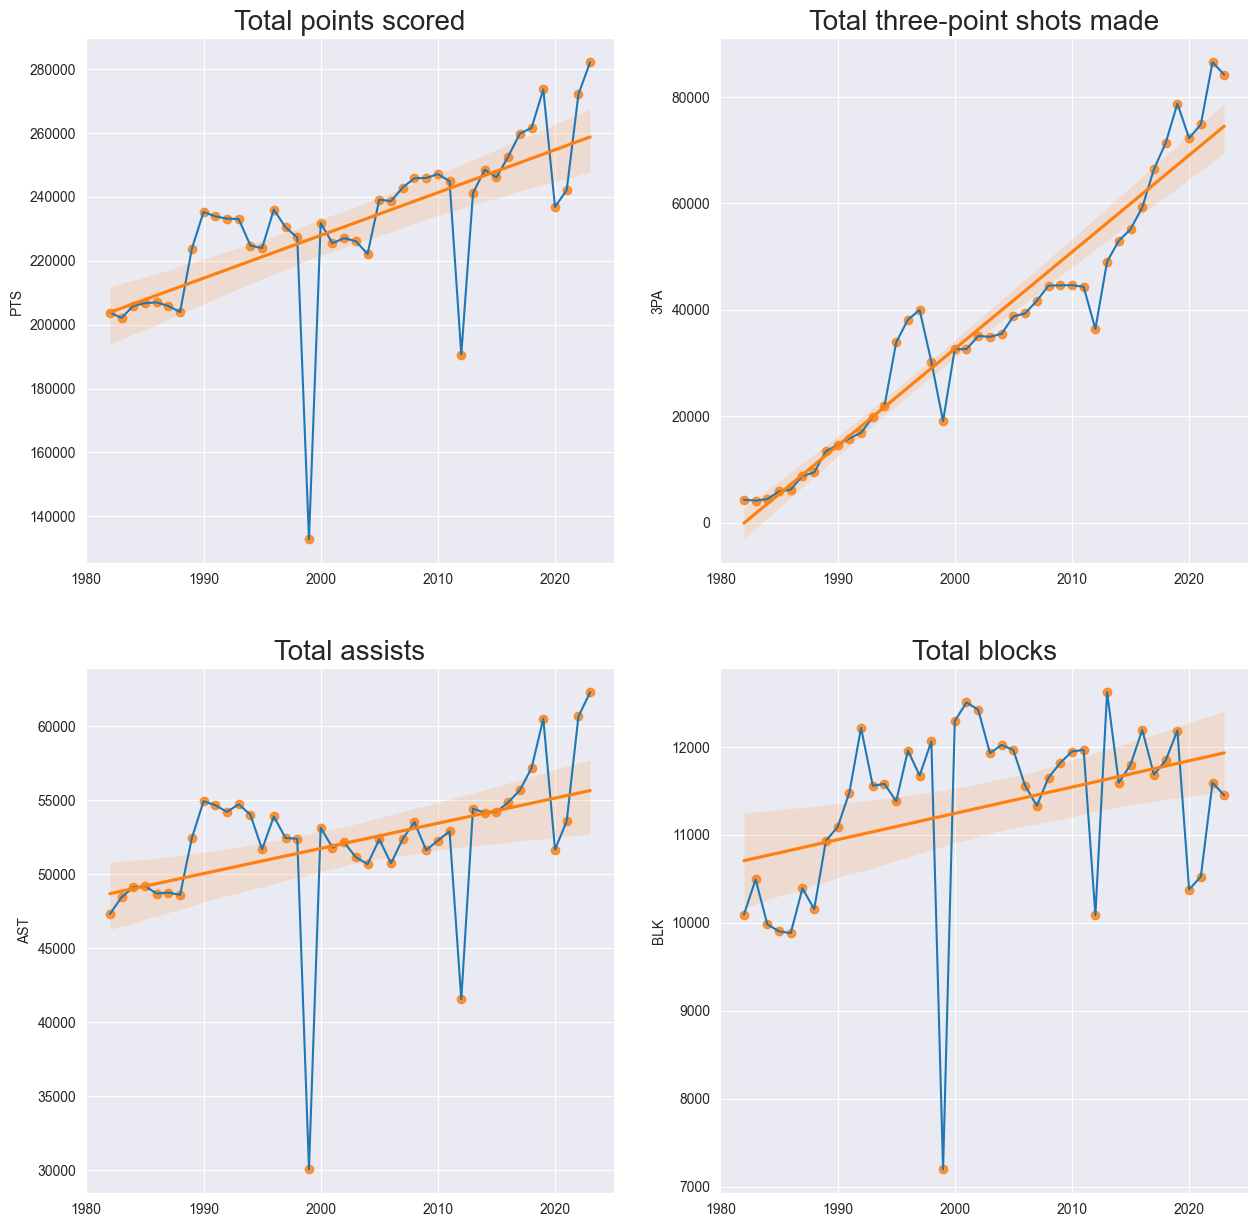

In [192]:
years = data_eda['Year'].unique()
pts = data_eda.groupby('Year')['PTS'].sum()
threes = data_eda.groupby('Year')['3PA'].sum()
blk = data_eda.groupby('Year')['BLK'].sum()
ast = data_eda.groupby('Year')['AST'].sum()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)
sns.lineplot(x = years,y = pts,ax = ax[0,0])
ax[0,0].set_title("Total points scored",fontsize=20)
sns.regplot(x = years,y = pts,ax = ax[0,0])
sns.lineplot(x = years,y = threes,ax = ax[0,1])
ax[0,1].set_title("Total three-point shots made",fontsize=20)
sns.regplot(x = years,y = threes,ax = ax[0,1])
sns.lineplot(x = years,y = ast,ax = ax[1,0])
ax[1,0].set_title("Total assists",fontsize=20)
sns.regplot(x = years,y = ast,ax = ax[1,0])
sns.lineplot(x = years,y = blk,ax = ax[1,1])
ax[1,1].set_title("Total blocks",fontsize=20)
sns.regplot(x = years,y =blk,ax = ax[1,1])
fig.set_facecolor('white')


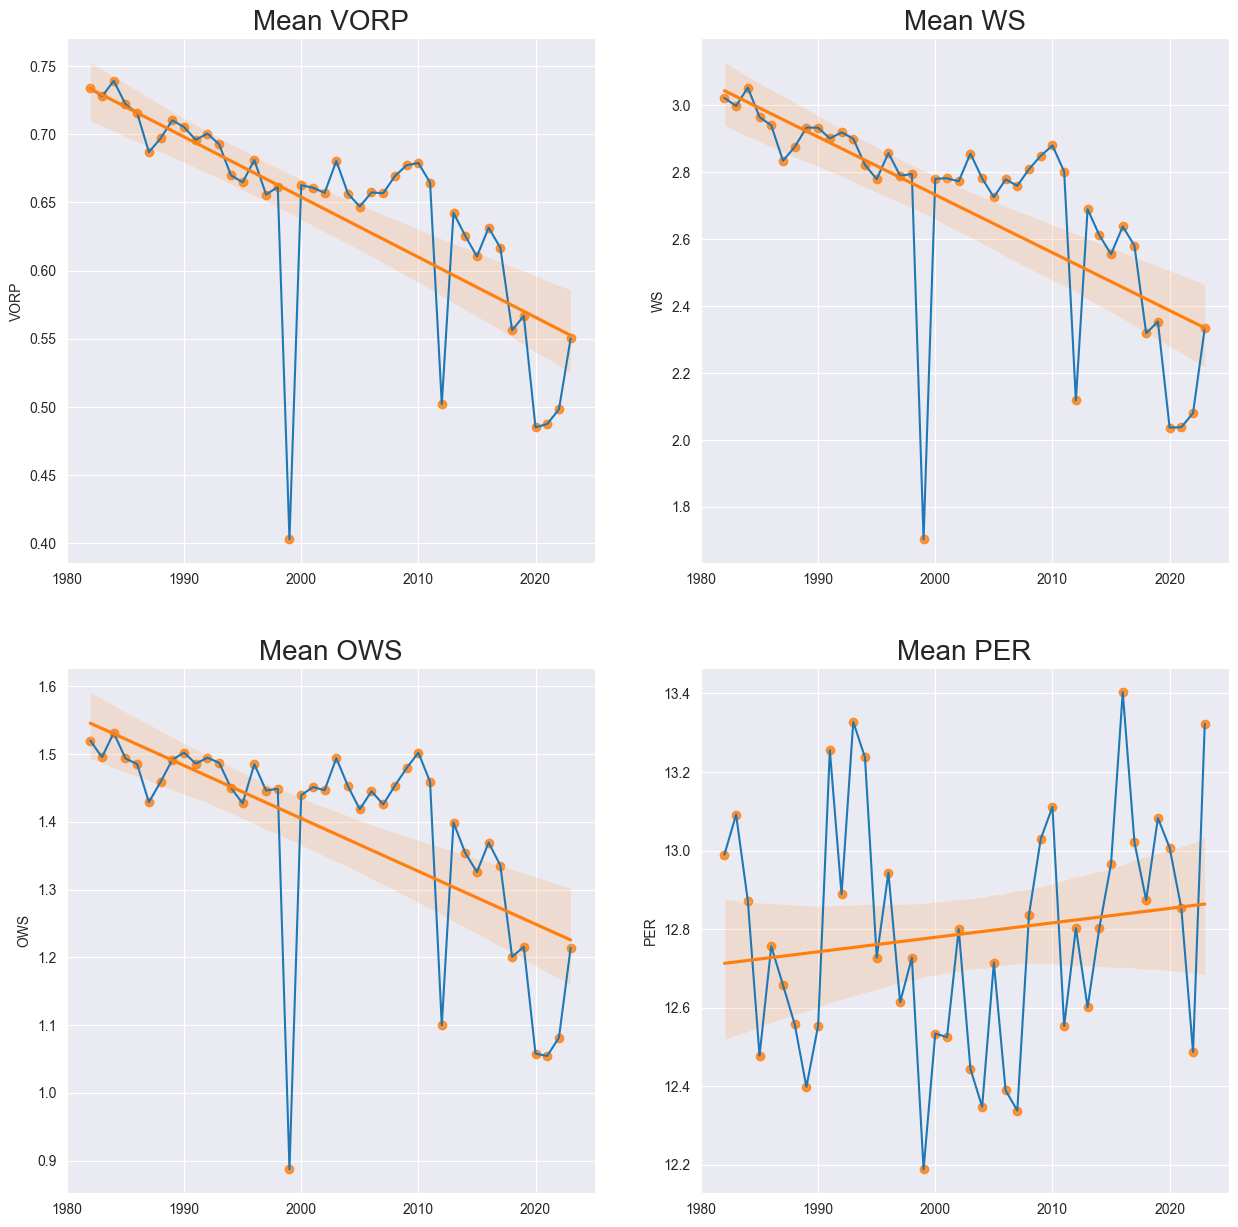

In [193]:
years = data_eda['Year'].unique()
vorp = data_eda.groupby('Year')['VORP'].mean()
ws = data_eda.groupby('Year')['WS'].mean()
ows = data_eda.groupby('Year')['OWS'].mean()
per = data_eda.groupby('Year')['PER'].mean()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,15)
sns.lineplot(x = years,y = vorp,ax = ax[0,0])
ax[0,0].set_title("Mean VORP",fontsize=20)
sns.regplot(x = years,y = vorp,ax = ax[0,0])
sns.lineplot(x = years,y = ws,ax = ax[0,1])
ax[0,1].set_title("Mean WS",fontsize=20)
sns.regplot(x = years,y = ws,ax = ax[0,1])
sns.lineplot(x = years,y = ows,ax = ax[1,0])
ax[1,0].set_title("Mean OWS",fontsize=20)
sns.regplot(x = years,y = ows,ax = ax[1,0])
sns.lineplot(x = years,y = per,ax = ax[1,1])
ax[1,1].set_title("Mean PER",fontsize=20)
sns.regplot(x = years,y =per,ax = ax[1,1])
fig.set_facecolor('white')


<Axes: ylabel='Age'>

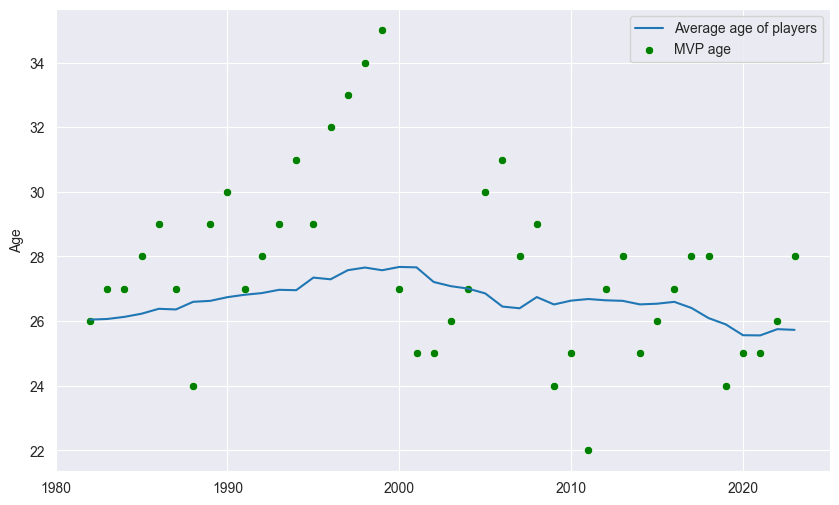

In [194]:
ages = data_eda.groupby('Year')['Age'].mean()
sns.lineplot(x = years,y = ages,label="Average age of players")
sns.scatterplot(x = years,y = data_eda[data_eda.MVP == 1]['Age'],color='green',label="MVP age")


<Axes: xlabel='Age', ylabel='Count'>

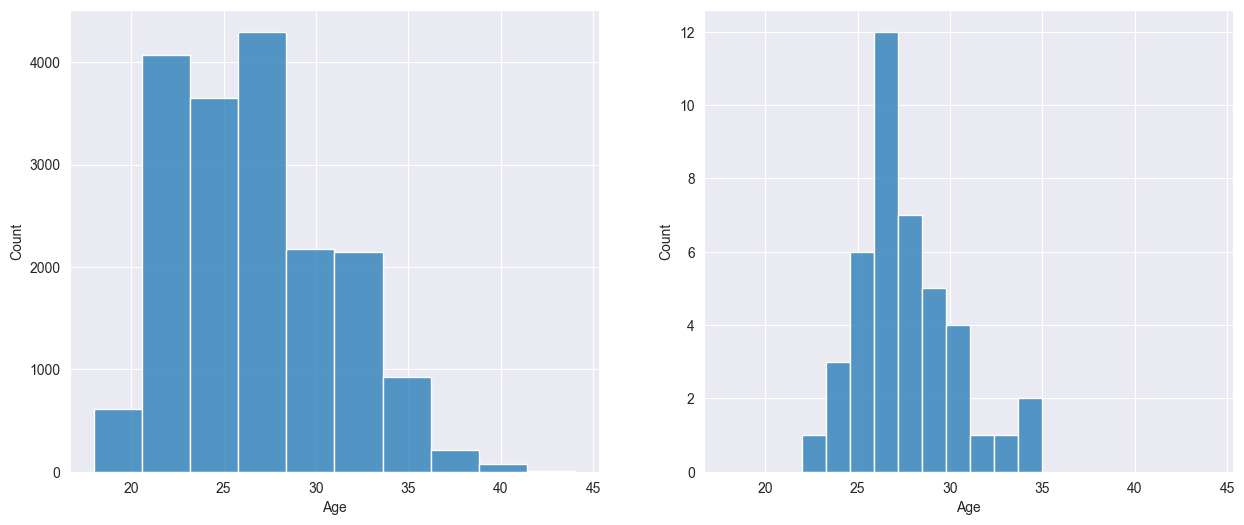

In [195]:
fig, axs = plt.subplots(ncols=2,sharex=True)
fig.set_figwidth(15)
sns.histplot(data_eda[data_eda.MVP == 0]['Age'],ax=axs[0],bins=10)
sns.histplot(data_eda[data_eda.MVP == 1]['Age'],ax=axs[1],bins=10)

<Axes: xlabel='MVP', ylabel='Age'>

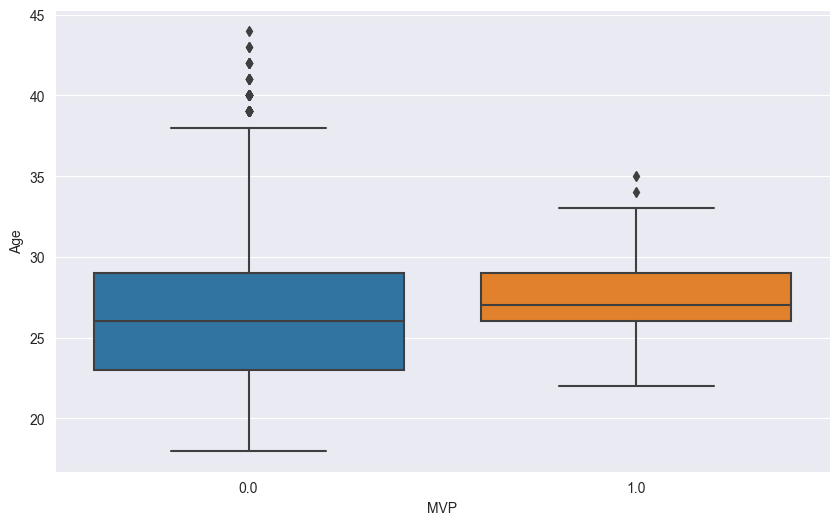

In [196]:
sns.boxplot(x = data_eda['MVP'],y = data_eda['Age'])

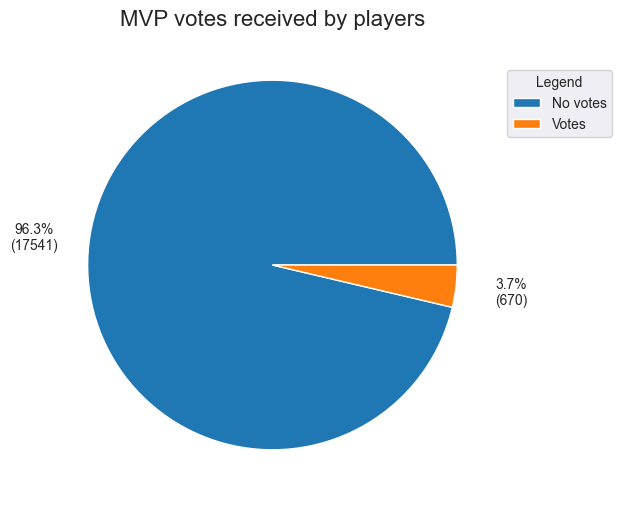

In [197]:
from collections import Counter

classes = data["award_share"] > 0

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("MVP votes received by players",fontsize=16)
ax.legend(["No votes", "Votes"],
          title="Legend",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

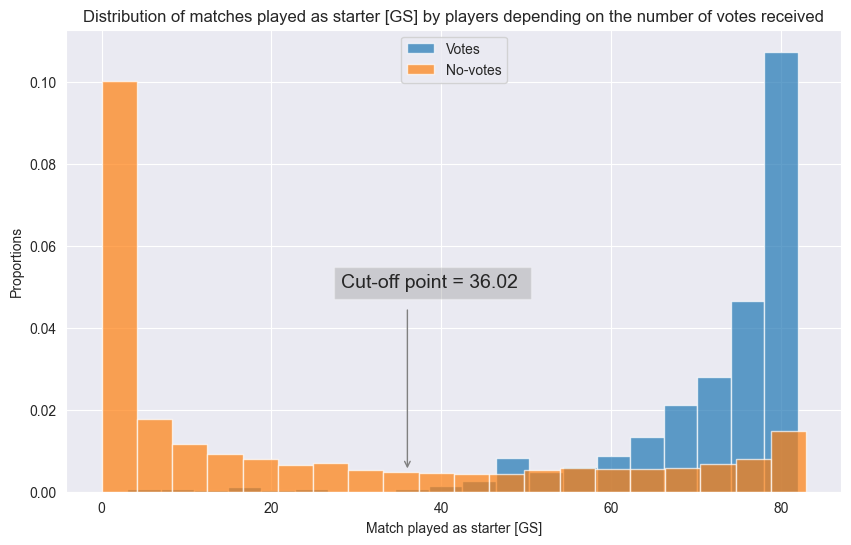

In [198]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]
gs_cutoff = np.round(mvpShares["GS"].mean() - 3*mvpShares["GS"].std(),2)

plt.hist(mvpShares["GS"], bins = 20, alpha = 0.7, density=True, label = "Votes")
plt.hist(nonMvpShares["GS"], bins = 20, alpha = 0.7, density=True, label = "No-votes")
plt.ylabel("Proportions")
plt.xlabel("Match played as starter [GS]")
plt.title("""Distribution of matches played as starter [GS] by players depending on the number of votes received""")
plt.figtext(.4, .45, f"Cut-off point = {gs_cutoff} ",fontsize = 14,bbox ={'facecolor':'grey', 
                   'alpha':0.3, 'pad':5})
plt.legend()
plt.annotate("", xy=(gs_cutoff, 0.005), xytext=(gs_cutoff, 0.045), arrowprops={"arrowstyle":"->", "color":"gray"})
plt.show()

In [199]:
mvpShares[mvpShares["GS"] < gs_cutoff][["Year", "Player", "G", "GS",'award_share']].reset_index(drop = True)

,Year,Player,G,GS,award_share
0,1982,Michael Cooper,76,14.0,0.004
1,1991,Kevin McHale,68,10.0,0.001
2,1992,Detlef Schrempf,80,4.0,0.001
3,1995,Michael Jordan,17,17.0,0.011
4,1995,Dennis Rodman,49,26.0,0.009
5,1996,Magic Johnson,32,9.0,0.007
6,1999,Darrell Armstrong,50,15.0,0.002
7,1999,Steve Smith,36,36.0,0.001
8,1999,Rasheed Wallace,49,18.0,0.001
9,2008,Manu Ginobili,74,23.0,0.007


In [200]:
data = data[data["GS"] > gs_cutoff]
data = data.reset_index(drop = True)
len(data)

5871

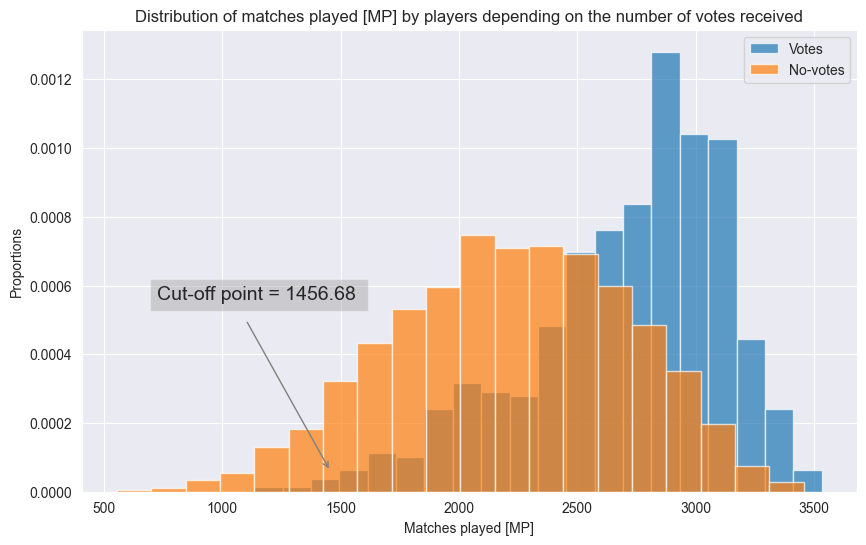

In [201]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]
mp_cutoff = np.round(mvpShares["MP"].mean() - 3*mvpShares["MP"].std(),2)

plt.hist(mvpShares["MP"], bins = 20, alpha = 0.7, density=True, label = "Votes")
plt.hist(nonMvpShares["MP"], bins = 20, alpha = 0.7, density=True, label = "No-votes")
plt.ylabel("Proportions")
plt.xlabel("Matches played [MP]")
plt.title("Distribution of matches played [MP] by players depending on the number of votes received")
plt.figtext(.2, .43, f"Cut-off point = {mp_cutoff} ",fontsize = 14,bbox ={'facecolor':'grey', 
                   'alpha':0.3, 'pad':5})
plt.annotate("", xy=(mp_cutoff, 0.00006), xytext=(1100, 0.0005), arrowprops={"arrowstyle":"->", "color":"gray"})
plt.legend()
plt.show()


In [202]:
mvpShares[mvpShares["MP"] < mp_cutoff][["Year", "Player", "MP",'award_share']].reset_index(drop = True)

,Year,Player,MP,award_share
0,1999,Mark Jackson,1382.0,0.001
1,1999,Arvydas Sabonis,1349.0,0.003
2,2007,Shaquille O'Neal,1135.0,0.002
3,2012,Derrick Rose,1375.0,0.004


In [203]:
data = data[data["MP"] > mp_cutoff]
data = data.reset_index(drop = True)
len(data)

5507

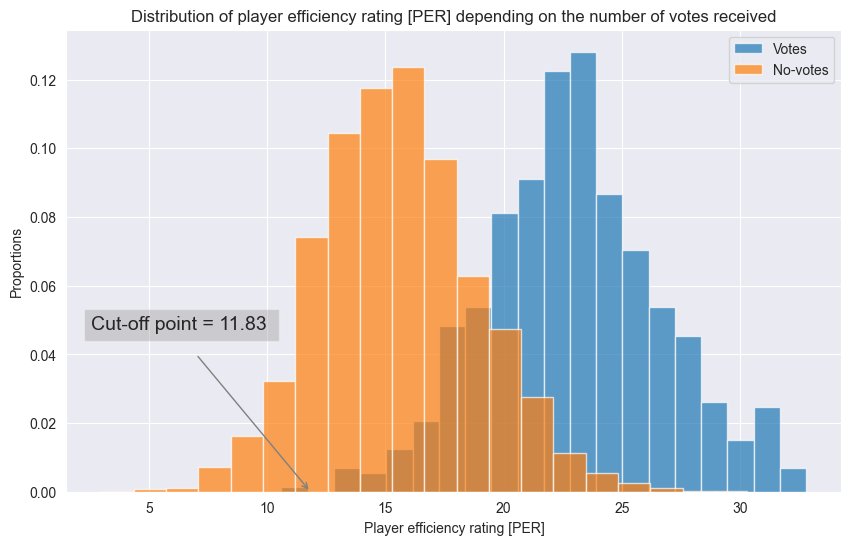

In [204]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]
per_cutoff = np.round(mvpShares["PER"].mean() - 3*mvpShares["PER"].std(),2)

plt.hist(mvpShares["PER"], bins = 20, alpha = 0.7, density=True, label = "Votes")
plt.hist(nonMvpShares["PER"], bins = 20, alpha = 0.7, density=True, label = "No-votes")
plt.ylabel("Proportions")
plt.xlabel("Player efficiency rating [PER]")
plt.title("Distribution of player efficiency rating [PER] depending on the number of votes received")
plt.figtext(.15, .38, f"Cut-off point = {per_cutoff} ",fontsize = 14,bbox ={'facecolor':'grey', 
                   'alpha':0.3, 'pad':5})
plt.annotate("", xy=(per_cutoff, 0.0000006), xytext=(7, 0.04), arrowprops={"arrowstyle":"->", "color":"gray"})
plt.legend()
plt.show()

In [205]:
mvpShares[mvpShares["PER"] < per_cutoff][["Year", "Player", "PER",'award_share']].reset_index(drop = True)

,Year,Player,PER,award_share
0,1989,Mark Eaton,10.6,0.004


In [206]:
data = data[data["PER"] > per_cutoff]
data = data.reset_index(drop = True)
len(data)

4912

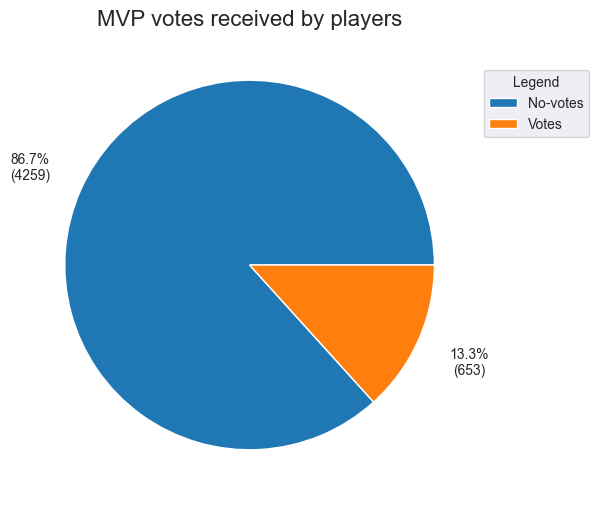

In [207]:
from collections import Counter

classes = data["award_share"] > 0

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("MVP votes received by players",fontsize=16)
ax.legend(["No-votes", "Votes"],
          title="Legend",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

In [208]:
mvpShares = data[data["award_share"] > 0]
nonMvpShares = data[data["award_share"] == 0]

vorp_cutoff = mvpShares["VORP"].mean() - 3 * mvpShares["VORP"].std()
print(f"The cutoff is {vorp_cutoff:.3f} VORP")

bpm_cutoff = mvpShares["BPM"].mean() - 3 * mvpShares["BPM"].std()
print(f"The cutoff is {bpm_cutoff:.3f} BPM")

The cutoff is -1.379 VORP
The cutoff is -3.271 BPM


In [209]:
mvpShares[(mvpShares["VORP"] <  vorp_cutoff)][["Year", "Player", "VORP","BPM",'award_share']].reset_index(drop = True)

,Year,Player,VORP,BPM,award_share


In [210]:
mvpShares[(mvpShares["BPM"] <  bpm_cutoff)][["Year", "Player", "VORP","BPM",'award_share']].reset_index(drop = True)

,Year,Player,VORP,BPM,award_share


In [211]:
data = data[ (data["VORP"] >  vorp_cutoff) & (data["BPM"] >  bpm_cutoff) ]
data = data.reset_index(drop = True)
len(data)

4853

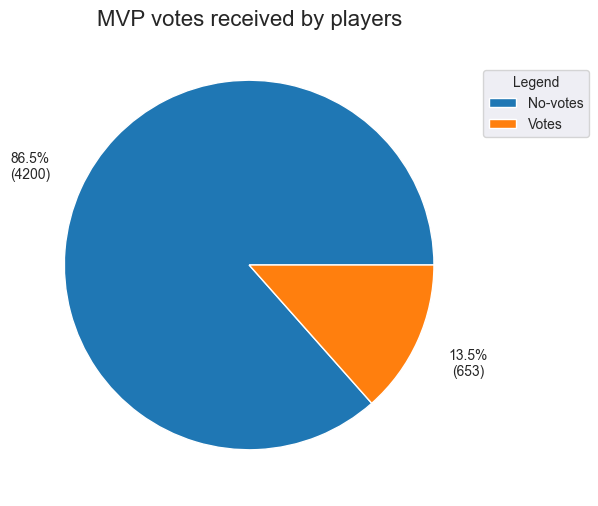

In [212]:
from collections import Counter

classes = data["award_share"] > 0

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("MVP votes received by players",fontsize=16)
ax.legend(["No-votes", "Votes"],
          title="Legend",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

In [213]:
data.to_csv("data/data_after_eda_new.csv")